Something of the recent changes improved model training dramatically:
* changed the code, moved to parameter simplenamespaces instead of having the parameters all over the code, tried to isolate the functions and make it as generic as possible (this might have fixed some bugs unintentionally?!)
* Reduced model size from 100M to around 10M parameters by reducing the hidden dimension
* Changed timestep sampling from uniform to beta distr.

In [4]:
# Old
# `Alpha-8d/transformer_Sana-7L-MBERT_config.json` `156.41M` parameters
config_old = {
  "_class_name": "SanaTransformer2DModel",
  "_diffusers_version": "0.32.0.dev0",
  "attention_bias": False,
  "attention_head_dim": 32,
  "num_attention_heads": 36,
  "caption_channels": 768,
  "cross_attention_dim": 1152,
  "cross_attention_head_dim": 72,
  "num_cross_attention_heads": 16,
  "dropout": 0.0,
  "in_channels": 32,
  "mlp_ratio": 2.5,
  "norm_elementwise_affine": False,
  "norm_eps": 1e-06,
  "num_layers": 7,
  "out_channels": 32,
  "patch_size": 1,
  "sample_size": 32
}

# New 
# `Alpha-17/transformer_Sana-DiT-S-MBERT.json` `17.78M` parameters
config_new = {
  "_class_name": "SanaTransformer2DModel",
  "_diffusers_version": "0.32.0.dev0",
  "attention_bias": False,
  "attention_head_dim": 32,
  "caption_channels": 768,
  "cross_attention_dim": 384,
  "cross_attention_head_dim": 32,
  "dropout": 0.0,
  "in_channels": 32,
  "mlp_ratio": 2.5,
  "norm_elementwise_affine": False,
  "norm_eps": 1e-06,
  "num_attention_heads": 12,
  "num_cross_attention_heads": 12,
  "num_layers": 7,
  "out_channels": 32,
  "patch_size": 1,
  "sample_size": 32
}

In [6]:
from tabulate import tabulate  # you might need to pip install tabulate

data = [(k, config_old[k], config_new[k]) for k in config_old]
print(tabulate(data, headers=['Parameter', 'Old', 'New'], tablefmt='grid'))


+---------------------------+------------------------+------------------------+
| Parameter                 | Old                    | New                    |
+===========================+========================+========================+
| _class_name               | SanaTransformer2DModel | SanaTransformer2DModel |
+---------------------------+------------------------+------------------------+
| _diffusers_version        | 0.32.0.dev0            | 0.32.0.dev0            |
+---------------------------+------------------------+------------------------+
| attention_bias            | False                  | False                  |
+---------------------------+------------------------+------------------------+
| attention_head_dim        | 32                     | 32                     |
+---------------------------+------------------------+------------------------+
| num_attention_heads       | 36                     | 12                     |
+---------------------------+-----------

So basically the hidden dim was reduced to 384, the number of layers stayed the same. As I said, I don't know why, the training looked a lot better.

**logarithmic** scaled X axis! vastly better with just 20 epochs versus 400 before! trained in 

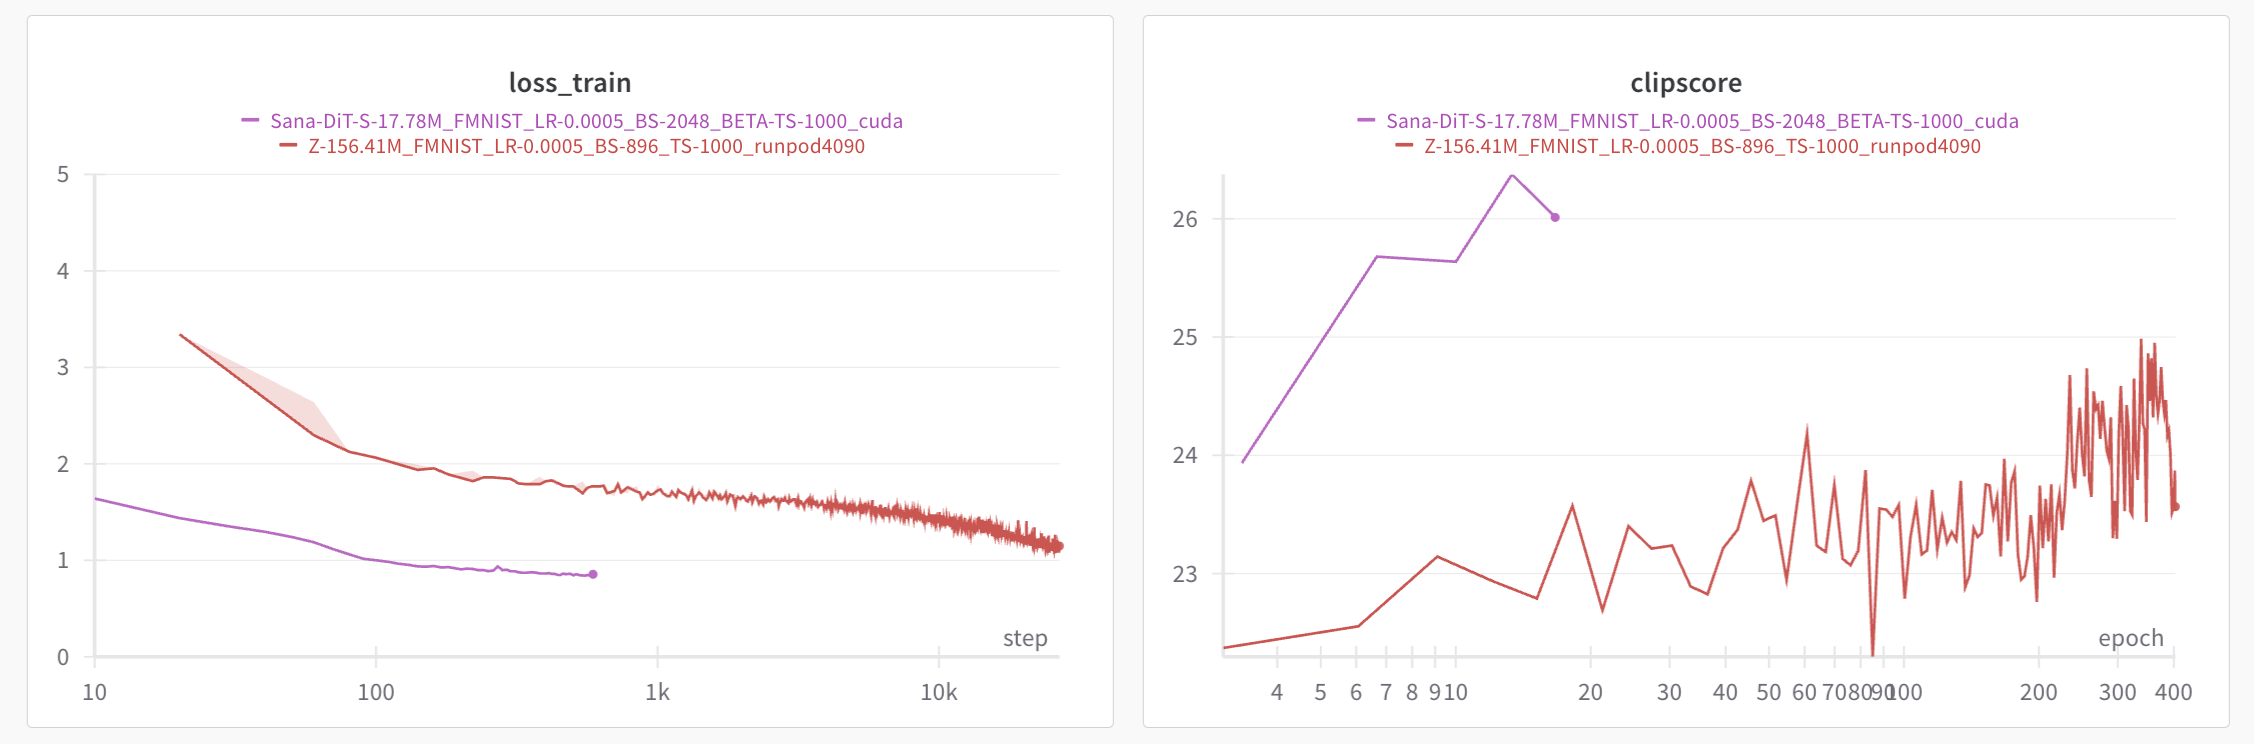

156M model: https://wandb.ai/g-ronimo/Hana/runs/zosah03p

17M model: https://wandb.ai/g-ronimo/Hana/runs/t0r6wcj6

Also the final images look a lot better

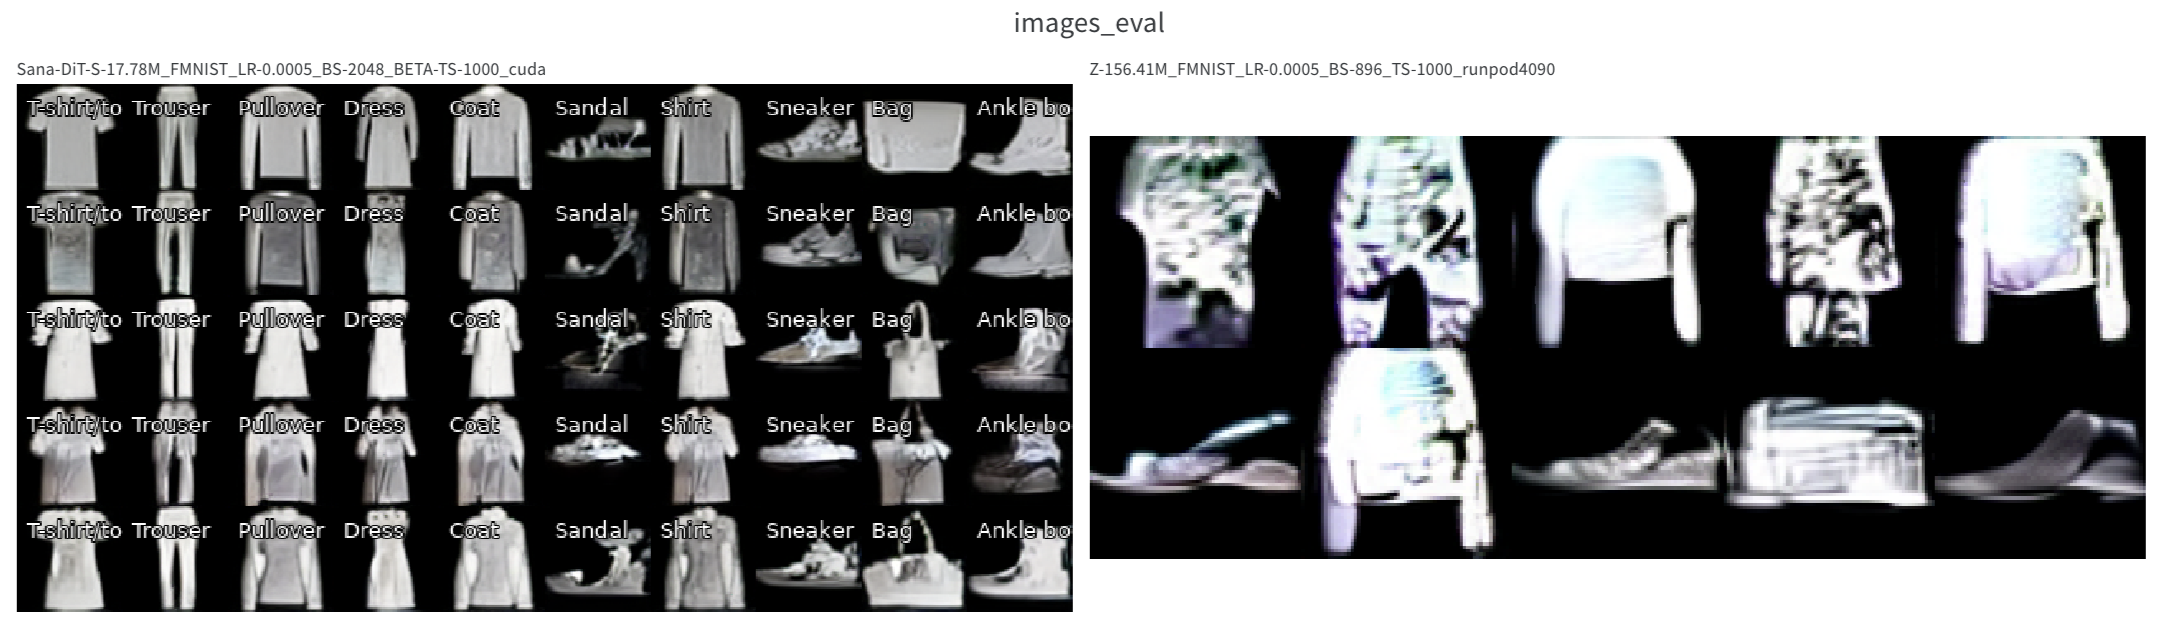